In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
Data = pd.read_csv('../input/noshowappointments/KaggleV2-May-2016.csv')
Data['No-show'] = Data['No-show'].map({'Yes':1,'No':0})
Data

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,0
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,0
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,0
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,2.572134e+12,5651768,F,2016-05-03T09:15:35Z,2016-06-07T00:00:00Z,56,MARIA ORTIZ,0,0,0,0,0,1,0
110523,3.596266e+12,5650093,F,2016-05-03T07:27:33Z,2016-06-07T00:00:00Z,51,MARIA ORTIZ,0,0,0,0,0,1,0
110524,1.557663e+13,5630692,F,2016-04-27T16:03:52Z,2016-06-07T00:00:00Z,21,MARIA ORTIZ,0,0,0,0,0,1,0
110525,9.213493e+13,5630323,F,2016-04-27T15:09:23Z,2016-06-07T00:00:00Z,38,MARIA ORTIZ,0,0,0,0,0,1,0


In [3]:
#Data wrangling
pd.set_option('display.max_columns', None)
Data.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026,0.201933
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873,0.401444
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,1.000000


## First impression
- there are no missing values for any feature
- for age : 1- average is 37 years
             2- there is negative values and extreme values reach 115 years
             3- 25% of patients are under 18 years
                25% of patients are over 55 years
- less than 25% of patients have a scholarship
- less than 25% of patients have Hipertension
- less than 25% of patients have Diabetes
- less than 25% of patients are Alcoholists
- less than 25% of patients have a Handcap , hancap should be 1 or 0 but it has a max value of 4
- less than 25% of patients are No-show
'''

In [4]:
Data.nunique()

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

##### there are 5 values for handcap
##### there are 104 different ages .. so we will have alot of extreme values
##### we have a PatientsIds around 0.56 of AppointmentsID ..
##### so most of the patients called more than one time or we have some patients called to much .. we will investigate

In [5]:
total_calls_per_patient = Data.PatientId.value_counts(sort=False)
total_calls_per_patient

7.433899e+13     2
8.462796e+13     1
1.687560e+13     1
8.682467e+14     1
6.235218e+14     1
                ..
1.322475e+14     1
6.111461e+13     4
2.833933e+13    10
8.287469e+12     1
5.133834e+14     1
Name: PatientId, Length: 62299, dtype: int64

In [6]:
no_show_per_patient = Data.groupby("PatientId",sort=False)['No-show'].sum()
no_show_per_patient

PatientId
2.987250e+13    0
5.589978e+14    0
4.262962e+12    0
8.679512e+11    1
8.841186e+12    0
               ..
9.876246e+13    0
8.674778e+13    0
7.263315e+13    0
9.969977e+14    0
1.557663e+13    0
Name: No-show, Length: 62299, dtype: int64

In [7]:
patient_credibility = pd.DataFrame(total_calls_per_patient)
patient_credibility = patient_credibility.rename(columns={'PatientId':'total_calls_per_patient'})

In [8]:
patient_credibility['no_show_per_patient']=no_show_per_patient
patient_credibility['patient credibility percentage']=(total_calls_per_patient-no_show_per_patient)/total_calls_per_patient

In [9]:
patient_credibility.describe()

,total_calls_per_patient,no_show_per_patient,patient credibility percentage
count,62299.000000,62299.000000,62299.000000
mean,1.774138,0.358256,0.803570
std,1.770324,0.689779,0.351419
min,1.000000,0.000000,0.000000
25%,1.000000,0.000000,0.666667
50%,1.000000,0.000000,1.000000
75%,2.000000,1.000000,1.000000
max,88.000000,18.000000,1.000000


/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='patient credibility percentage', ylabel='Density'>

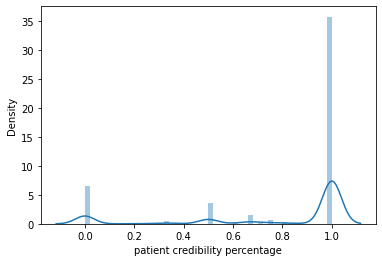

In [10]:
sb.distplot(patient_credibility['patient credibility percentage'])

In [11]:
#supposing that if a person called more than twice and did not show is trustless
#so we can remove them as outliers while making predictions (according to business view)
trustless_patients = ((patient_credibility['total_calls_per_patient'] > 2 ) & 
                      (patient_credibility['patient credibility percentage'] == 0 ))
patient_credibility['trustless_patients']=trustless_patients
sum(patient_credibility['trustless_patients']) #191 out of 62299 patients

191

In [12]:
#Cleaning
#Exploring age
print(sum(Data.Age <0)) 
print(sum(Data.Age >90)) 
print(sum(Data.Age >100)) 

1
308
7


In [13]:
#dropping negative age values
Data[Data.Age < 0 ].index
Data = Data.drop(index= 99832 )

In [14]:
# handcap must be boolean .. so we will drop other values 
Data.Handcap = [int(x) for x in Data.Handcap]
sum(Data.Handcap >1) # 199 patients
indices = Data[Data.Handcap >1].index #indices for patients with handcap values > 1
Data = Data.drop(index=indices)
Data

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,0
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,0
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,0
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,2.572134e+12,5651768,F,2016-05-03T09:15:35Z,2016-06-07T00:00:00Z,56,MARIA ORTIZ,0,0,0,0,0,1,0
110523,3.596266e+12,5650093,F,2016-05-03T07:27:33Z,2016-06-07T00:00:00Z,51,MARIA ORTIZ,0,0,0,0,0,1,0
110524,1.557663e+13,5630692,F,2016-04-27T16:03:52Z,2016-06-07T00:00:00Z,21,MARIA ORTIZ,0,0,0,0,0,1,0
110525,9.213493e+13,5630323,F,2016-04-27T15:09:23Z,2016-06-07T00:00:00Z,38,MARIA ORTIZ,0,0,0,0,0,1,0


## EDA

Attendance percentage = 79.81% 
Absence percentage = 20.19% 


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


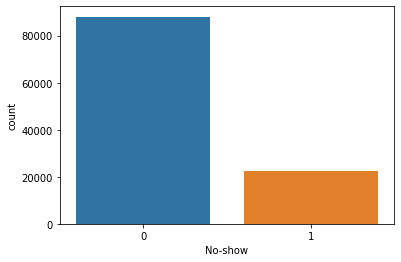

In [15]:
sb.countplot(Data['No-show'])
print("Attendance percentage = {0:0.2f}% ".format(len(Data[Data['No-show']==0])  / (Data.shape[0]) *100))
print("Absence percentage = {0:0.2f}% ".format(len(Data[Data['No-show']==1])  / (Data.shape[0]) *100))

<AxesSubplot:>

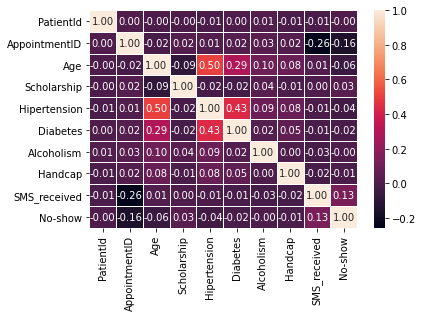

In [16]:
#correlation between features
sb.heatmap(Data.corr(),annot=True,linewidths=1,fmt='0.2f')

poor correlation with dependant variable but we see good correlation between 
age & hipertension , diabetes & hipertension and diabetes & age .. True medical fact 

SMS received attendance percentage = 72.41 %
No SMS received attendance percentage = 83.31 %


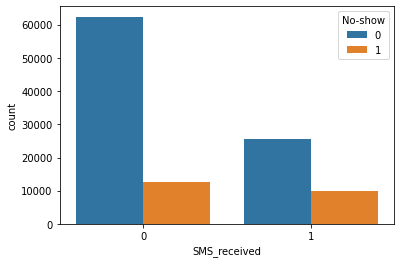

In [17]:
sb.countplot(x=Data['SMS_received'],hue=Data['No-show'])

SMS_received_attendance_percentage = len(Data[(Data['SMS_received']== 1 ) & (Data['No-show']==0)]) / len(Data[Data['SMS_received'] == 1])*100
print('SMS received attendance percentage = {0:0.2f} %'.format(SMS_received_attendance_percentage))

No_SMS_received_attendance_percentage =len(Data[(Data['SMS_received']== 0 ) & (Data['No-show']==0)]) / len(Data[Data['SMS_received'] == 0])*100
print('No SMS received attendance percentage = {0:0.2f} %'.format(No_SMS_received_attendance_percentage))

so the people who already received a SMS are almost divided equally between show and No-show but we have
a higher percentage of attendance for people who didn't receive a SMS
we may run a Matched pair design A/B test to see how SMS affect no-show

Handcap attendance percentage = 82.08 %
No Handcap attendance percentage = 79.76 %


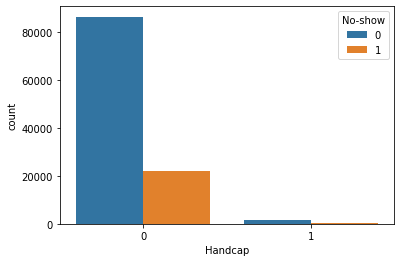

In [18]:
sb.countplot(x=Data['Handcap'],hue=Data['No-show'])

Handcap_attendance_percentage = len(Data[(Data['Handcap']== 1 ) & (Data['No-show']==0)]) / len(Data[Data['Handcap'] == 1])*100
print('Handcap attendance percentage = {0:0.2f} %'.format(Handcap_attendance_percentage))

No_Handcap_attendance_percentage =len(Data[(Data['Handcap']== 0 ) & (Data['No-show']==0)]) / len(Data[Data['Handcap'] == 0])*100
print('No Handcap attendance percentage = {0:0.2f} %'.format(No_Handcap_attendance_percentage))

we have a higher number of people who had a handcap classified as No-show but 
 seems that it doesn't affect No-show as the percents of attendance are almost equal

Alcoholism attendance percentage = 79.86 %
No Alcoholism attendance percentage = 79.81 %


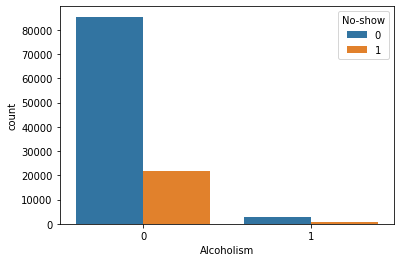

In [19]:
sb.countplot(x=Data['Alcoholism'],hue=Data['No-show'])

Alcoholism_attendance_percentage = len(Data[(Data['Alcoholism']== 1 ) & (Data['No-show']==0)]) / len(Data[Data['Alcoholism'] == 1])*100
print('Alcoholism attendance percentage = {0:0.2f} %'.format(Alcoholism_attendance_percentage))

No_Alcoholism_attendance_percentage =len(Data[(Data['Alcoholism']== 0 ) & (Data['No-show']==0)]) / len(Data[Data['Alcoholism'] == 0])*100
print('No Alcoholism attendance percentage = {0:0.2f} %'.format(No_Alcoholism_attendance_percentage))

we have a higher number of people who are alcoholists classified as No-show but 
 seems that it doesn't affect No-show as the percents of attendance are equal

Diabetes attendance percentage = 82.00 %
No Diabetes attendance percentage = 79.64 %


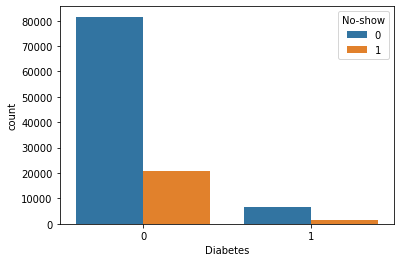

In [20]:
sb.countplot(x=Data['Diabetes'],hue=Data['No-show'])

Diabetes_attendance_percentage = len(Data[(Data['Diabetes']== 1 ) & (Data['No-show']==0)]) / len(Data[Data['Diabetes'] == 1])*100
print('Diabetes attendance percentage = {0:0.2f} %'.format(Diabetes_attendance_percentage))

No_Diabetes_attendance_percentage =len(Data[(Data['Diabetes']== 0 ) & (Data['No-show']==0)]) / len(Data[Data['Diabetes'] == 0])*100
print('No Diabetes attendance percentage = {0:0.2f} %'.format(No_Diabetes_attendance_percentage))

we have a higher number of people who have diabetes classified as No-show but 
 seems that it doesn't affect No-show as the percents of attendance are almost equal

Scholarship attendance percentage = 82.00 %
No Scholarship attendance percentage = 76.23 %


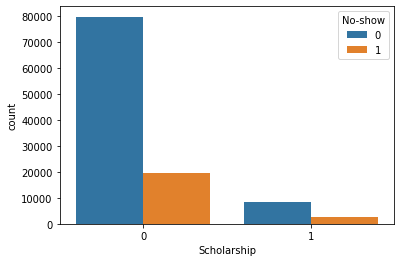

In [21]:
sb.countplot(x=Data['Scholarship'],hue=Data['No-show'])

Scholarship_attendance_percentage = len(Data[(Data['Scholarship']== 1 ) & (Data['No-show']==0)]) / len(Data[Data['Scholarship'] == 1])*100
print('Scholarship attendance percentage = {0:0.2f} %'.format(Diabetes_attendance_percentage))

No_Scholarship_attendance_percentage =len(Data[(Data['Scholarship']== 0 ) & (Data['No-show']==0)]) / len(Data[Data['Scholarship'] == 0])*100
print('No Scholarship attendance percentage = {0:0.2f} %'.format(Scholarship_attendance_percentage))

we have a higher number of people who have scholarships classified as No-show but 
 seems that it doesn't affect No-show as the percents of attendance are almost equal

Hipertension attendance percentage = 82.00 %
No Hipertension attendance percentage = 79.09 %


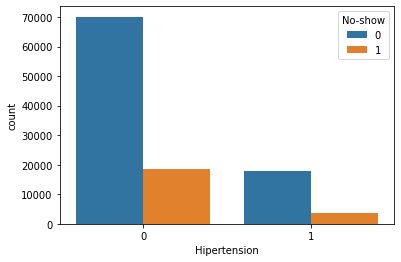

In [22]:
sb.countplot(x=Data['Hipertension'],hue=Data['No-show'])

Hipertension_attendance_percentage = len(Data[(Data['Hipertension']== 1 ) & (Data['No-show']==0)]) / len(Data[Data['Hipertension'] == 1])*100
print('Hipertension attendance percentage = {0:0.2f} %'.format(Diabetes_attendance_percentage))

No_Hipertension_attendance_percentage =len(Data[(Data['Hipertension']== 0 ) & (Data['No-show']==0)]) / len(Data[Data['Hipertension'] == 0])*100
print('No Hipertension attendance percentage = {0:0.2f} %'.format(No_Hipertension_attendance_percentage))

we have a higher number of people who have Hipertension classified as No-show but 
 seems that it doesn't affect No-show as the percents of attendance are almost equal

males attendance percentage = 80.02 %
femles attendance percentage = 79.69 %


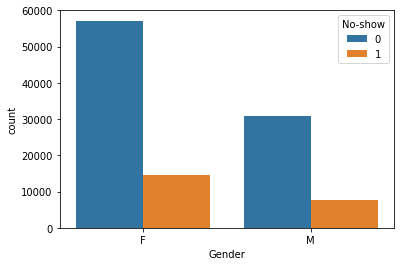

In [23]:
sb.countplot(x=Data['Gender'],hue=Data['No-show'])

males_attendance_percentage = len(Data[(Data.Gender == 'M') & (Data['No-show']==0)]) / len(Data[Data.Gender == 'M'])*100
print('males attendance percentage = {0:0.2f} %'.format(males_attendance_percentage))

females_attendance_percentage = len(Data[(Data.Gender == 'F') & (Data['No-show']==0)]) / len(Data[Data.Gender == 'F'])*100
print('femles attendance percentage = {0:0.2f} %'.format(females_attendance_percentage))

altough number of female patients are almost twice the number of male patients but we have almost 
    equal percentage of attendance for both

In [24]:
#we have 81 neighbourhood so we couldn't show in a plot 
#but we will see what neighbourhoods have the highest and the lowesr percents of attendance 

Neighbourhoods_names = Data.Neighbourhood.unique()
Neighbourhoods = []
Neighbourhood_attendance_percentage = []
for i in Neighbourhoods_names:
    Neighbourhood = str(i)
    Neighbourhood_attendance_per = len(Data[(Data.Neighbourhood == str(i)) & (Data['No-show']==0)]) / len(Data[Data.Neighbourhood ==str(i)])*100
    Neighbourhoods.append(Neighbourhood)
    Neighbourhood_attendance_percentage.append(Neighbourhood_attendance_per)

In [25]:
Neighbourhoods_attendance_percentages = pd.DataFrame(data=Neighbourhoods_names,columns=['Neighbourhood']) 
Neighbourhoods_attendance_percentages['Percentage']= np.array(Neighbourhood_attendance_percentage).round()
Neighbourhoods_attendance_percentages = Neighbourhoods_attendance_percentages.sort_values(by='Percentage',)
Neighbourhoods_attendance_percentages['Percentage'].describe(include='all')

count     81.000000
mean      79.444444
std        9.712106
min        0.000000
25%       78.000000
50%       80.000000
75%       82.000000
max      100.000000
Name: Percentage, dtype: float64

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Percentage', ylabel='Density'>

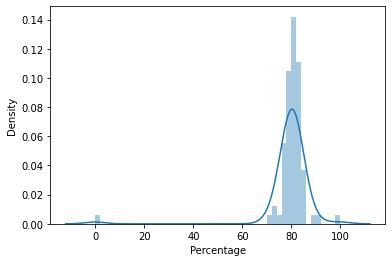

In [26]:
sb.distplot(Neighbourhoods_attendance_percentages['Percentage'])

so we have an average attendance of 79.5% per each neighbourhood but we have high standard deviation
because we have some neighbour close to 100 percent 

In [27]:
#checking neighbourhoods attendance percentages away from the mean (outliers)
Neighbourhoods_attendance_percentages[Neighbourhoods_attendance_percentages['Percentage'] > 90]

,Neighbourhood,Percentage
75,ILHA DO BOI,91.0
80,PARQUE INDUSTRIAL,100.0


In [28]:
print(len(Data[(Data.Neighbourhood =='ILHA DO BOI' ) & (Data['No-show']==0)]))
print(len(Data[Data.Neighbourhood =='ILHA DO BOI'])) # 32 out of 35 attended the appointment

32
35


In [29]:
print(len(Data[(Data.Neighbourhood =='PARQUE INDUSTRIAL' ) & (Data['No-show']==0)]))
print(len(Data[Data.Neighbourhood =='PARQUE INDUSTRIAL'])) 
# there is only one patient from this neighbourhood

1
1


In [30]:
print(Neighbourhoods_attendance_percentages[Neighbourhoods_attendance_percentages['Percentage'] < 10])
print(len(Data[(Data.Neighbourhood =='ILHAS OCEÂNICAS DE TRINDADE' ) & (Data['No-show']==0)]))
# there is no patients in this neighbourhood

                  Neighbourhood  Percentage
79  ILHAS OCEÂNICAS DE TRINDADE         0.0
0


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='No-show', ylabel='Age'>

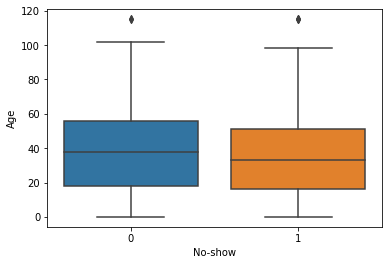

In [31]:
sb.boxplot(Data['No-show'],Data['Age'])

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Comparing age distributions for show & No-show')

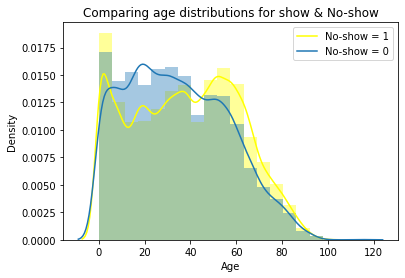

In [32]:
# comparing the age distributions for both No-show and show
sb.distplot(Data['Age'][Data['No-show'] == 0],bins=20,color='yellow') 
sb.distplot(Data['Age'][Data['No-show'] == 1],bins=20)
plt.legend({'No-show = 0','No-show = 1'})
plt.title('Comparing age distributions for show & No-show')

seems that from 10 years to 40 years more people will ignore their appointments as the graph show a higher freqencies @ the blue curve in this period .. this is real fact as in this years everyone be more youth and powerful ... and at the first 5 years the patients attend ( the yellow curve shows higher density ) as thier parents care about them ... same for people above 45 we see higher density at the yellow curve meaning that they are more careful about attendence and their health

In [33]:
## converting time
import datetime as dt
Data['ScheduledDay'] = pd.to_datetime(Data['ScheduledDay']).dt.date.astype('datetime64[ns]')
Data['AppointmentDay'] = pd.to_datetime(Data['AppointmentDay']).dt.date.astype('datetime64[ns]')
Data['ScheduledDay']

0        2016-04-29
1        2016-04-29
2        2016-04-29
3        2016-04-29
4        2016-04-29
            ...    
110522   2016-05-03
110523   2016-05-03
110524   2016-04-27
110525   2016-04-27
110526   2016-04-27
Name: ScheduledDay, Length: 110327, dtype: datetime64[ns]

In [34]:
#exploring dates
ScheduledDays = [ x.day for x in Data['ScheduledDay'] ]
ScheduledDays_of_week = [ x.weekday() for x in Data['ScheduledDay'] ]
ScheduledMonths = [ x.month for x in Data['ScheduledDay'] ]

AppointmentDays = [ x.day for x in Data['AppointmentDay'] ]
AppointmentDays_of_week = [ x.weekday() for x in Data['AppointmentDay'] ]
AppointmentMonths = [ x.month for x in Data['AppointmentDay'] ]

ScheduledDays_of_week[:20]

[4, 4, 4, 4, 4, 2, 2, 2, 4, 2, 2, 1, 3, 3, 3, 1, 3, 3, 1, 4]

In [35]:
date_series = {'ScheduledDays':ScheduledDays,
               'ScheduledDays_of_week':ScheduledDays_of_week,
               'ScheduledMonths':ScheduledMonths,
               'AppointmentDays':AppointmentDays,
               'AppointmentDays_of_week':AppointmentDays_of_week,
               'AppointmentMonths':AppointmentMonths,
                   }
#creating a detailed date datafrmae
dates_indetail = pd.DataFrame(date_series)
dates_indetail['No-show'] = Data['No-show']
dates_indetail[:5]

,ScheduledDays,ScheduledDays_of_week,ScheduledMonths,AppointmentDays,AppointmentDays_of_week,AppointmentMonths,No-show
0,29,4,4,29,4,4,0.0
1,29,4,4,29,4,4,0.0
2,29,4,4,29,4,4,0.0
3,29,4,4,29,4,4,0.0
4,29,4,4,29,4,4,0.0


In [36]:
dates_indetail.describe(include='all')

,ScheduledDays,ScheduledDays_of_week,ScheduledMonths,AppointmentDays,AppointmentDays_of_week,AppointmentMonths,No-show
count,110327.000000,110327.000000,110327.000000,110327.000000,110327.000000,110327.000000,110127.000000
mean,14.252667,1.852067,4.823806,12.499361,1.858276,5.210094,0.201867
std,9.345836,1.378527,0.715840,9.056694,1.371710,0.473767,0.401395
min,1.000000,0.000000,1.000000,1.000000,0.000000,4.000000,0.000000
25%,6.000000,1.000000,4.000000,5.000000,1.000000,5.000000,0.000000
50%,13.000000,2.000000,5.000000,10.000000,2.000000,5.000000,0.000000
75%,22.000000,3.000000,5.000000,19.000000,3.000000,5.000000,0.000000
max,31.000000,5.000000,12.000000,31.000000,5.000000,6.000000,1.000000


for both scheduled and appointment days of week , people like the first 3 days more

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Days of month')

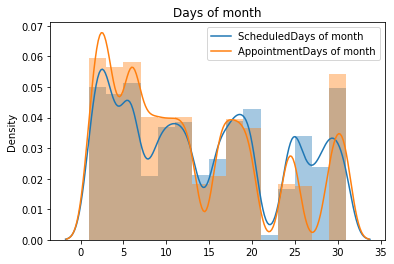

In [37]:
sb.distplot(ScheduledDays,bins=15)
sb.distplot(AppointmentDays,bins=15)
plt.legend({'ScheduledDays of month','AppointmentDays of month'})
plt.title('Days of month')

so we could see that people calls more to schedule an appointment at the first and the end
    of months as we see the decrease after the first 5 days till it reachs the lowest possible 
    @ the last 10 days of the month then it begins to increase @ the last days of month

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='AppointmentDays_of_week', ylabel='count'>

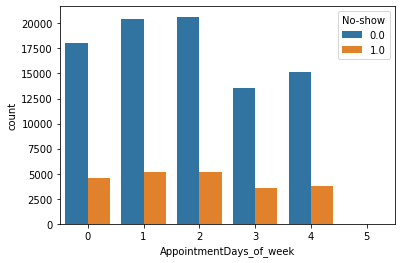

In [38]:
sb.countplot(dates_indetail['AppointmentDays_of_week'],
             hue = dates_indetail['No-show'])

In [39]:
days = []
each_day_attendance_percent = []
for i in dates_indetail['AppointmentDays_of_week'].unique():
    percentage = len(dates_indetail[(dates_indetail['AppointmentDays_of_week'] == int(i)) & (dates_indetail['No-show'] == 0 )]) / len(dates_indetail[dates_indetail['AppointmentDays_of_week'] == int(i)])*100
    days.append(i)
    each_day_attendance_percent.append(percentage)
    
print('days of week ',days)
print('attendance percent for each day' , [round(x) for x in each_day_attendance_percent ])

days of week  [4, 1, 0, 2, 3, 5]
attendance percent for each day [80, 80, 80, 80, 79, 85]


we se almost equal percents so day of the week doesn't affect attendance rate

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='AppointmentMonths', ylabel='count'>

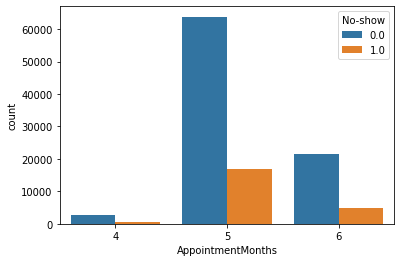

In [40]:
sb.countplot(dates_indetail['AppointmentMonths'],
             hue = dates_indetail['No-show'])
#seems that May was full of patients

## Multivariate Analysis


<AxesSubplot:xlabel='No-show', ylabel='count'>

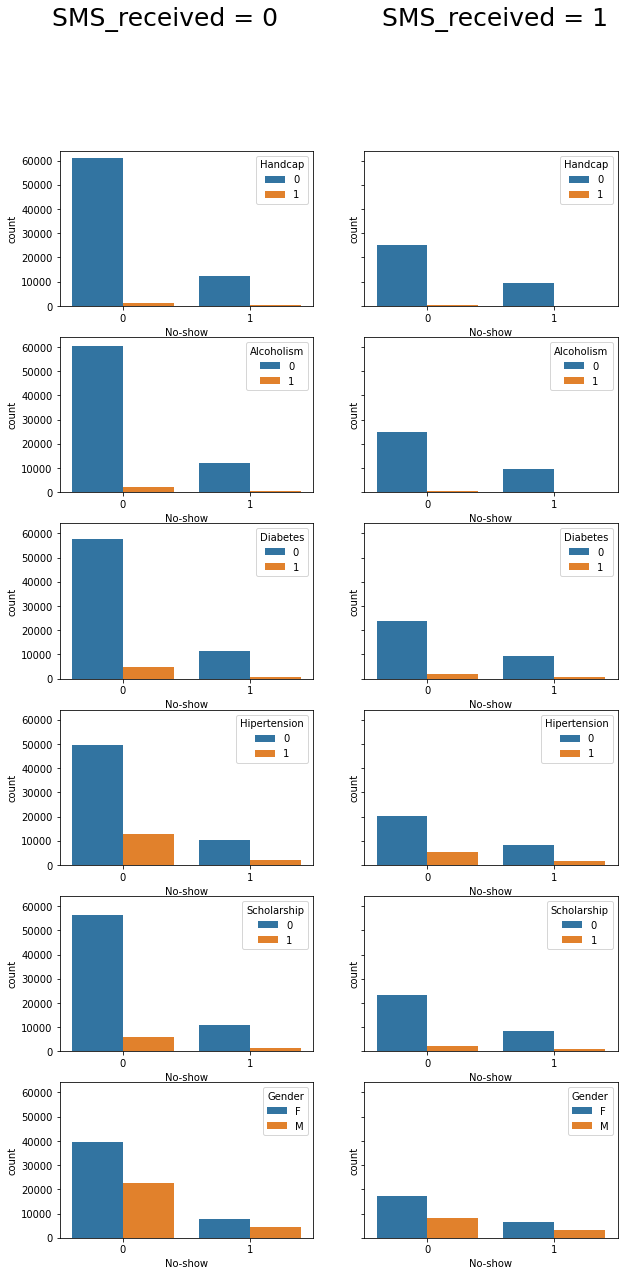

In [41]:
# Exploring each feature with SMS_received investigating how could they affect the attendance 
fig, ax = plt.subplots(6, 2,figsize=(10,20),sharey=True)
fig.suptitle('SMS_received = 0             SMS_received = 1' , fontsize=25)
sb.countplot( x= Data['No-show'][Data['SMS_received'] == 0 ] , hue=Data['Handcap'] , ax=ax[0,0] )
sb.countplot( x= Data['No-show'][Data['SMS_received'] == 1 ] , hue=Data['Handcap'] , ax=ax[0,1] )
sb.countplot( x= Data['No-show'][Data['SMS_received'] == 0 ] , hue=Data['Alcoholism'] , ax=ax[1,0] )
sb.countplot( x= Data['No-show'][Data['SMS_received'] == 1 ] , hue=Data['Alcoholism'] , ax=ax[1,1] )
sb.countplot( x= Data['No-show'][Data['SMS_received'] == 0 ] , hue=Data['Diabetes'] , ax=ax[2,0] )
sb.countplot( x= Data['No-show'][Data['SMS_received'] == 1 ] , hue=Data['Diabetes'] , ax=ax[2,1] )
sb.countplot( x= Data['No-show'][Data['SMS_received'] == 0 ] , hue=Data['Hipertension'] , ax=ax[3,0] )
sb.countplot( x= Data['No-show'][Data['SMS_received'] == 1 ] , hue=Data['Hipertension'] , ax=ax[3,1] )
sb.countplot( x= Data['No-show'][Data['SMS_received'] == 0 ] , hue=Data['Scholarship'] , ax=ax[4,0] )
sb.countplot( x= Data['No-show'][Data['SMS_received'] == 1 ] , hue=Data['Scholarship'] , ax=ax[4,1] )
sb.countplot( x= Data['No-show'][Data['SMS_received'] == 0 ] , hue=Data['Gender'] , ax=ax[5,0] )
sb.countplot( x= Data['No-show'][Data['SMS_received'] == 1 ] , hue=Data['Gender'] , ax=ax[5,1] )

now we could answer business questions for any feature and SMS_receiving for ex.
### which one is better , sending SMS by gender or by scholarship ??!!
we compare each pair of charts we will see how sending a SMS to people who have scholarships
will decrease the No-show ( the will remember to attend the appointment ) but for gender
seems that sending a SMS will not have any effect 

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='No-show', ylabel='Age'>

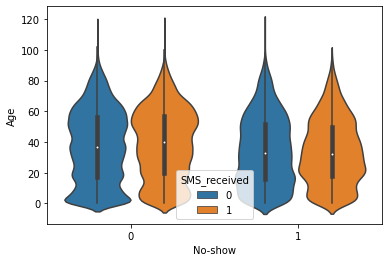

In [42]:
sb.violinplot(Data['No-show'],Data['Age'],hue=Data['SMS_received'])

we can see how the plot become denser in the age between 45 and 65 when we send a SMS
    notice that this is mostly due to sending SMS because we can see how slightly the vilion
    become denser in the same range if we don't send a SMS

In [43]:
# checking sending SMS by Neighbourhood
data_1 = Data.groupby('Neighbourhood')['No-show','SMS_received'].sum().sort_values(by='Neighbourhood')
data_1['number of patient / neighbourhood'] = Data['Neighbourhood'].value_counts().sort_index()
data_1['SMS_received attendance percent / neighbourhood'] = 100* data_1['SMS_received']/(data_1['number of patient / neighbourhood'] - 
                                                             data_1['No-show'] )

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


In [44]:
data_1['SMS_received attendance percent / neighbourhood'].describe()

count    80.000000
mean     40.867366
std       9.477022
min       0.000000
25%      37.384445
50%      42.093356
75%      45.341438
max      75.000000
Name: SMS_received attendance percent / neighbourhood, dtype: float64

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='SMS_received attendance percent / neighbourhood', ylabel='Density'>

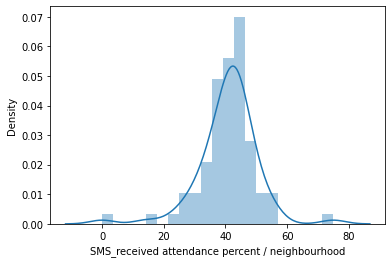

In [45]:
sb.distplot(data_1['SMS_received attendance percent / neighbourhood'])

so we will focus on sending SMS to the highest neibourhood attendance percent ( above mean 42% )

In [46]:
data_1[data_1['SMS_received attendance percent / neighbourhood'] > 42].index #41 neighbourhoods
data_1[data_1['SMS_received attendance percent / neighbourhood'] > 60].index # the most important one 

Index(['ILHA DO FRADE'], dtype='object', name='Neighbourhood')

# Conclusions
* we have a higher number of people who had a handcap classified as No-show but seems that it doesn't affect the No-show (attendance).
* from 10 years to 40 years more people will ignore their appointments this is a real fact as in this years everyone be more youth and powerful ...and at the first 5 years the patients attend ( the yellow curve shows higher density ) as thier parents care about them.
* we could see that people calls more to schedule an appointment at the first and the end of months as we see the decrease after the first 5 days till it reachs the lowest possible @ the last 10 days of the month then it begins to increase @ the last days of month.
* day of the week doesn't affect attendance rate
* we need to send more SMSs to people who have scholarships
* we need to send more SMSs to people between 45 and 65 years old.
* we need to send more SMSs to the neighbourhoods which have a higher percet of attendance especially ( ILHA DO FRADE )

# TO BE CONTINUED ....